## Reunion
- Raices de una ecuacion
    - Condiseraciones para utilizar el Metodo
    - Situaciones de Aplicaciones

## Instalacion
Para comenzar, es necesario instalar el paquete `sympy` antes de poder utilizarlo en tu programa de Python. A continuación, se presentan varias formas de instalar el paquete `sympy`:

1. **Instalación utilizando pip:**

   ```bash
   pip install sympy
   ```

   Este comando instalará el paquete `sympy` a través del administrador de paquetes de Python, `pip`. Asegúrate de tener `pip` instalado y configurado correctamente en tu entorno.

2. **Instalación utilizando conda:**

   ```bash
   conda install sympy
   ```

   Si utilizas el administrador de paquetes `conda`, puedes instalar `sympy` ejecutando este comando. Asegúrate de tener `conda` instalado y configurado en tu entorno.

3. **Instalación mediante entornos de desarrollo integrados (IDEs):**

   Algunos entornos de desarrollo integrados (IDEs), como PyCharm o Anaconda Navigator, ofrecen interfaces gráficas que permiten instalar paquetes de Python de forma sencilla. Puedes buscar y seleccionar `sympy` desde la interfaz gráfica y seguir los pasos proporcionados para completar la instalación.

Es recomendable utilizar la opción que mejor se adapte a tu entorno y flujo de trabajo. Una vez instalado el paquete `sympy`, podrás importarlo en tu programa de Python y utilizarlo para realizar cálculos simbólicos y algebraicos.

# Instalación de paquetes de Python

A continuación, se proporciona la documentación para instalar los paquetes de Python "numpy" y "matplotlib" utilizando la herramienta "pip".

## numpy

### Descripción

"NumPy" es una biblioteca fundamental de Python utilizada para realizar operaciones matemáticas y numéricas eficientes en matrices y arreglos multidimensionales.

### Instalación

1. Abre una terminal o línea de comandos.

2. Ejecuta el siguiente comando:
   
   ```
   pip install numpy
   ```

   Este comando descargará e instalará el paquete "numpy" y todas sus dependencias.

3. Verifica la instalación ejecutando el siguiente comando en la terminal:
   
   ```
   python -c "import numpy; print(numpy.__version__)"
   ```

   Esto imprimirá la versión de "numpy" instalada, lo que indica que la instalación se realizó correctamente.

## matplotlib

### Descripción

"Matplotlib" es una biblioteca de trazado en 2D de Python que produce figuras de alta calidad en una variedad de formatos y entornos.

### Instalación

1. Abre una terminal o línea de comandos.

2. Ejecuta el siguiente comando:
   
   ```
   pip install matplotlib
   ```

   Este comando descargará e instalará el paquete "matplotlib" y todas sus dependencias.

3. Verifica la instalación ejecutando el siguiente comando en la terminal:
   
   ```
   python -c "import matplotlib; print(matplotlib.__version__)"
   ```

   Esto imprimirá la versión de "matplotlib" instalada, lo que indica que la instalación se realizó correctamente.

In [1]:
from functools import reduce
from sympy import  expand,Poly,symbols,Matrix,latex,roots
from IPython.display import display, Math
import numpy as np
import matplotlib.pyplot as plt
def print_poly(p:Poly):
    display(Math(latex(p)))


In [2]:
class Raices:
    def __init__(self,error,maxIterations) -> None:
        self.error = error
        self.maxIterations = maxIterations
    def biseccion(self,x0, x1, f):
        """
        :param x0: Menor valor en el que creemos esta
                    el resultado.
        :param x1: Mayor valor en el que creemos esta
                    el resultado.
        :return: El resultado.
        """
        fx = None
        for i in range(self.maxIterations):
            f1 = f(x0)
            f2 = f(x1)
            if f1 * f2 > 0:
                raise Exception('')
            x_actual = (x0 + x1) / 2
            fx = f(x_actual)
            if fx * f1 < 0:
                x1 = x_actual
            else:
                x0 = x_actual
            if abs(fx) < self.error:
                return x_actual
        return fx
    def reglaFalsa(self,x0, x1, f):
        """
        :param x0: Valor inferior de x
        :param x1: Valor superior de x
        """
        for i in range(self.maxIterations):
            Fx0 = f(x0)
            Fx1 = f(x1)
            if Fx0 * Fx1 > 0:
                print("No hay raiz en este rango")
                break;
            Xc = x0 - (Fx0 * (x1 - x0)) / (Fx1 - Fx0)
            Fxc = f(Xc)
            if (Fxc * Fx1) > 0:
                x1 = Xc
            else:
                x0 = Xc
            if abs(Fxc) < self.error:
                break
        return Xc

# Lectura de Matriz A partir de CSV

In [3]:
def parseRow(line):
    """
    Convierte una línea de texto en una lista de números de punto flotante.

    Args:
        line (str): Línea de texto que contiene los números separados por comas.

    Returns:
        list: Lista de números de punto flotante obtenidos al convertir la línea.

    Raises:
        ValueError: Si ocurre un error al convertir los caracteres en números de punto flotante.
    """
    try:
        numbers = line.replace("\n", "").split(',')
        return list(map(lambda char: float(char), numbers))
    except ValueError as e:
        raise ValueError(
            "Error al convertir los caracteres en números de punto flotante: " + str(e))


def getMatrixFromCsv(pathFile):
    import csv
    """
    Carga una matriz desde un archivo CSV y la devuelve como un objeto Matrix de Py_Matrix.

    Args:
        pathFile (str): Ruta del archivo CSV.

    Returns:
        Matrix: Objeto Matrix de Py_Matrix que representa la matriz cargada desde el archivo CSV.

    """
    matriz = []
    with open(pathFile, 'r') as archivo:
        lector_csv = csv.reader(archivo)
        for fila in lector_csv:
            fila_numeros = [int(numero) for numero in fila]
            matriz.append(fila_numeros)
    return Matrix(matriz)





def isVariation(a, b):
    """
    Determina si hay un cambio de signo entre los números a y b.

    Args:
        a (float): Primer número.
        b (float): Segundo número.

    Returns:
        int: 1 si hay un cambio de signo entre a y b, 0 en caso contrario.

    Examples:
        >>> isVariation(2, -3)
        1
        >>> isVariation(4, 4)
        0
    """
    if (a < 0 and b >= 0) or (a >= 0 and b < 0):
        return 1
    else:
        return 0

def numberOfVariations(numbers):
    s = 0
    for i in range(1,len(numbers)):
        s+=isVariation(numbers[i-1],numbers[i])
    return s


def reverse(array):
    """
    Invierte el orden de los elementos en un arreglo y lo devuelve.

    Args:
        array (list): Arreglo que se desea invertir.

    Returns:
        list: Arreglo con los elementos invertidos.

    Examples:
        >>> reverse([1, 2, 3, 4])
        [4, 3, 2, 1]
        >>> reverse(['a', 'b', 'c'])
        ['c', 'b', 'a']
    """
    return array[::-1]


# Obtencion del Polinomio caracteristico de una Matriz

In [4]:
def getPolynomial(matrix: Matrix):
    """
    Obtiene el polinomio característico de una matriz y lo devuelve como un objeto polinomial.

    Args:
        matrix (Matrix): Matriz de la cual se obtendrá el polinomio característico.

    Returns:
        Poly: Objeto polinomial que representa el polinomio característico de la matriz.
    """
    x = symbols('x')
    return matrix.charpoly(x).as_poly()

# Cambios de Signo

In [5]:
def isVariation(a, b):
    """
    Determina si hay un cambio de signo entre los números a y b.

    Args:
        a (float): Primer número.
        b (float): Segundo número.

    Returns:
        int: 1 si hay un cambio de signo entre a y b, 0 en caso contrario.

    Examples:
        >>> isVariation(2, -3)
        1
        >>> isVariation(4, 4)
        0
    """
    if (a < 0 and b >= 0) or (a >= 0 and b < 0):
        return 1
    else:
        return 0

def numberOfVariations(numbers):
    s = 0
    for i in range(1,len(numbers)):
        s+=isVariation(numbers[i-1],numbers[i])
    return s


def reverse(array):
    """
    Invierte el orden de los elementos en un arreglo y lo devuelve.

    Args:
        array (list): Arreglo que se desea invertir.

    Returns:
        list: Arreglo con los elementos invertidos.

    Examples:
        >>> reverse([1, 2, 3, 4])
        [4, 3, 2, 1]
        >>> reverse(['a', 'b', 'c'])
        ['c', 'b', 'a']
    """
    return array[::-1]


$$\text{Proposición 4.1 } \textit{Sea } p(z):=a_0+...+a_nz^n \textit{ con } a_n \neq 0 \newline
\textit{Si } z_0 \textit{ es una raiz de p entonces: } \newline
\lvert z_0 \rvert \leq \max{1,\frac{\lvert a_0 \rvert + \lvert a_1 \rvert+...+\lvert a_{n-1} \rvert}{\lvert a_n \rvert}}$$

In [6]:
def upperBoundForComplexRoots(poly: Poly):
    """
    Calcula el límite superior de las raíces complejas de un polinomio. Es un caso mas general.
    Si hablamos solo de raices reales solo sera el valor absoluto. Con esto sabemos que todas
    las raices reales del polinomio, si existen, estan entre (-x0,x0) siendo x0 el caso real de
    z0

    Args:
        poly (Poly): Objeto polinomial.

    Returns:
        float: Límite superior de las raíces complejas.
    Examples:
        >>> p = Poly('x**4-10*x**3+35*x**2-50*x+24')
        >>> 119 -> Todas las raices reales estan en (-119,119)
    """
    coefficients = reverse(poly.all_coeffs())
    lenCoeff = len(coefficients)
    an = coefficients[lenCoeff - 1]
    return max(1, reduce(lambda acc, new: abs(acc) + abs(new), coefficients[:lenCoeff - 1]) / an)

$$\text{Proposición 4.1 } \textit{Sea } p(x):=a_0+...+a_nx^n \textit{ con } a_n > 0 \newline
\textit{y al menos un coeficiente negativo.}\newline
\textit{Sean }\newline
i_0 := \text{máx}\{i,a_i<0\}\newline
M := \text{máx}\{\lvert a_i \rvert, a_i < 0\}\newline
\textit{Si r es un cero positivo de } p(x) \textit{, entonces } r\leq 1 + \sqrt[n-i_0]{\frac{M}{a_n}}

In [7]:
def calculateI_0(coefficients):
    """
    Calcula el valor de i_0 para una lista de coeficientes de un polinomio.

    Args:
        coefficients (list): Lista de coeficientes del polinomio.

    Returns:
        int: Valor de i_0, que representa el máximo índice i tal que a_i < 0.

    Examples:
        >>> coefficients = [2, -1, 3, -4, 0]
        >>> calculateI_0(coefficients)
        3
    """
    positionOfCoeff = 1
    positionOfIndex = 0
    coeffiAndIndex = list(filter(lambda x: x[positionOfCoeff] < 0, zip(range(len(coefficients)), coefficients)))
    i_0 = coeffiAndIndex[-1][positionOfIndex]
    return i_0

def calculateM(coefficients):
    """
    Calcula el valor de M para una lista de coeficientes de un polinomio.

    Args:
        coefficients (list): Lista de coeficientes del polinomio.

    Returns:
        float: Valor de M, que representa el máximo valor absoluto entre los coeficientes negativos.

    Examples:
        >>> coefficients = [2, -1, 3, -4, 0]
        >>> calculateM(coefficients)
        4.0
    """
    return max([abs(x) for x in coefficients if x < 0])


def checkPreconditions(poly: Poly):
    """
    Verifica las precondiciones necesarias para aplicar la fórmula en un polinomio.

    Args:
        poly (Poly): Objeto polinomial.

    Returns:
        bool: True si se cumplen las precondiciones, False en caso contrario.

    Examples:
        >>> p = Poly('3*x**2 - 2*x + 1', domain='QQ')
        >>> checkPreconditions(p)
        True
    """
    coefficients = reverse(poly.all_coeffs())
    a_n = coefficients[-1]
    numOfNegativeCoefficients = len(list(filter(lambda a_i: a_i < 0, coefficients)))
    return (a_n > 0) and (numOfNegativeCoefficients > 0)

def upperBoundMi(poly: Poly):
    """
    Calcula el límite superior de las raíces reales positivas de un polinomio.

    Args:
        poly (Poly): Objeto polinomial.

    Returns:
        float: Límite superior de las raíces reales positivas.

    Raises:
        Exception: Si el polinomio no cumple con los criterios para determinar el límite superior.

    Examples:
        Al graficar en geogebra podras ver que la raiz positiva mas grande es casi 5
        >>> p = Poly('x**2 - 5*x + 1')
        >>> upperBoundPositiveRealRoots(p)
        6
    """
    if not checkPreconditions(poly):
        raise Exception("The polynomial does not meet the criteria to determine the upper bound.")
    coefficients = reverse(poly.all_coeffs())
    n = poly.degree()
    i_0 = calculateI_0(coefficients)
    a_n = coefficients[-1]
    M = calculateM(coefficients)
    return (M / a_n) ** (1 / (n - i_0)) + 1

Teorema. Sea $p(x):=a_nx^n+...+a_1x+a_0 \in \mathbb{R}[x]$. Supongamos como antes que $a_n > 0$ y que hay al menos un coeficiente negativo. Sean:
$$s_i := \sum_{j>i,a_j > 0} a_j$$
y
$$R:=\max{}\{\frac{\lvert a_i \rvert}{s_i}:a_i<0\}$$
Si $p(x_0) = 0$ entonces $x_0<1+R$

In [8]:
def calculate_s_i(poly:Poly,i):
    coefficients = reverse(poly.all_coeffs())
    s = sum([x for x in coefficients[i+1:] if x > 0])
    return s
def calculateR(poly:Poly):
    if not checkPreconditions(poly):
        raise Exception("The polynomial does not meet the criteria to determine the upper bound.")
    coefficients = reverse(poly.all_coeffs())
    coeffAndIndex = list(filter(lambda t:t[0]<0,zip(coefficients,range(len(coefficients)))))
    elements = list(map(lambda t:abs(t[0])/calculate_s_i(poly,t[1]),coeffAndIndex))
    return max(elements)
def upperBoundR(poly:Poly):
    R = calculateR(poly)
    return 1+R

## Cotas Generales
Imaginemos que solo tenemos acceso a límites superiores para las raíces positivas de polinomios. Veamos cómo esto nos ayudará a mejorar las estimaciones de los límites inferiores tanto para las raíces positivas como para las negativas.

En realidad, si tenemos un polinomio p(x) ∈ R[x] de grado n, podemos considerar la situación de la siguiente manera:
$$
p_1(x) := x^np(\frac{1}{x})\newline
p_2(x) := p(-x)\newline
p_3(x) := x^np(-\frac{1}{x})\newline
$$
Teorema 4.7. Con las definiciones y notaciones anteriores, las raíces reales
de p(x) (si las hubiere) se encuentran en la unión de intervalos disjuntos:
$$(-N_2,-\frac{1}{N_3}) \cup (\frac{1}{N_1},N)$$

In [9]:
def poly_1(poly:Poly):
    x = symbols('x')
    n = poly.degree()
    p1 = ((x**n)*poly.subs(x,1/x)).simplify()
    p1 = Poly(str(p1.as_expr()))
    an = p1.all_coeffs()[0]
    if an < 0:
        return -1*p1
    return p1
def poly_2(poly:Poly):
    x = symbols('x')
    p2 = poly.subs(x,-x).simplify()
    p2 = Poly(str(p2.as_expr()))
    an = p2.all_coeffs()[0]
    if an < 0:
        return -1*p2
    return p2
def poly_3(poly:Poly):
    x = symbols('x')
    n = poly.degree()
    p3 = ((x**n)*poly.subs(x,-1/x)).simplify()
    p3 = Poly(str(p3.as_expr()))
    an = p3.all_coeffs()[0]
    if an < 0:
        return -1*p3
    return p3
def getUpperBound(p: Poly):
    """
    Calcula la minimia cota superior mediante 2 metodos para las raíces reales positivas de un polinomio.

    Args:
        p (Poly): Polinomio representado con el objeto `Poly` del paquete `sympy`.

    Returns:
        float: La cota superior para las raíces reales del polinomio.

    Example:
        >>> from sympy import Poly
        >>> p = Poly('x**3 - 2*x + 1')
        >>> upper_bound = getUpperBound(p)
        >>> print(upper_bound)
        2.41421356237309
    """
    R = upperBoundR(p)
    M = upperBoundMi(p)
    return min(R, M)


def getIntervals(p: Poly):
    """
    Obtiene los intervalos en los que se encuentran las raíces reales de un polinomio.

    Args:
        p (Poly): Polinomio representado con el objeto `Poly` del paquete `sympy`.

    Returns:
        list: Una lista de tuplas que representan los intervalos en los que se encuentran las raíces reales del polinomio.

    Raises:
        Exception: Si ocurre un error al calcular los intervalos.

    Example:
        >>> from sympy import Poly
        >>> p = Poly(x**2 - 4)
        >>> intervals = getIntervals(p)
        >>> print(intervals)
        [(-3, -4/5), (4/5, 3)]
    """
    try:
        p1 = poly_1(p)
        p2 = poly_2(p)
        p3 = poly_3(p)
        N = float(getUpperBound(p))
        N1 = float(getUpperBound(p1))
        N2 = float(getUpperBound(p2))
        N3 = float(getUpperBound(p3))
        return [(-N2, -1 / N3), (1 / N1, N)]
    except Exception:
        bound = float(upperBoundForComplexRoots(p))
        return [(-bound, bound)]


In [10]:
def sturmSequence(p:Poly):
    n = p.degree()
    sequence = [p,p.diff()]
    i = 2
    while n>0:
        c,r=sequence[i-2].div(sequence[i-1])
        sequence.append(-r)
        i+=1
        n=r.degree()
    return sequence
def numberOfRealRootsInInterval(x_0,x_1,sturmSequence,p:Poly):
    if x_0 >= x_1:
        raise Exception('')
    x = symbols('x')
    if p.subs(x,x_0) == 0 or p.subs(x,x_1) == 0:
        raise Exception('')
    polynomialsEvaluatedOnx0 = [p.subs(x,x_0) for p in sturmSequence]
    polynomialsOnx1 = [p.subs(x,x_1) for p in sturmSequence]
    a = numberOfVariations(polynomialsEvaluatedOnx0)
    b = numberOfVariations(polynomialsOnx1)
    return  a - b
def middleOfInterval(I):
    return (I[0]+I[1]) / 2
def splitInterval(I,sequence,storage,p:Poly):
    roots = 0
    x_0 = I[0]
    x_1 = I[1]
    try:
        roots = numberOfRealRootsInInterval(x_0,x_1,sequence,p)
    except:
        space = 1e-10
        x = symbols('x')
        inter = None
        inter2 = None
        if float(p.subs(x,x_0)) == 0:
            inter = (x_0,x_0)
            inter2 = (x_0+space,x_1)
        else:
            inter = (x_1,x_1)
            inter2 = (x_0,x_1-space)
        storage.append(inter)
        m = middleOfInterval(inter2)
        splitInterval((inter2[0],m),sequence,storage,p)
        splitInterval((m,inter2[1]),sequence,storage,p)
        return

    if roots == 0:
        return
    if roots == 1:
        return storage.append(I)
    m = middleOfInterval(I)
    splitInterval((I[0],m),sequence,storage,p)
    splitInterval((m,I[1]),sequence,storage,p)
def deleteDuplicates(array):
    return list(set(array))
def intervalSingleRoot(p:Poly):
    intervalsPrev = getIntervals(p)
    sequence = sturmSequence(p)
    singlesRoot = []
    for interval in intervalsPrev:
        splitInterval(interval,sequence,singlesRoot,p)
    return deleteDuplicates(singlesRoot)
def obtener_raices_complejas(polinomio):
    raices = polinomio.all_roots()

    raices_complejas = []

    for raiz in raices:
        real, imag = raiz.as_real_imag()
        if imag != 0:
            raices_complejas.append(raiz)

    return raices_complejas
def getRoots(p:Poly,metodoDeBusqueda):
    totalRoots = p.degree()
    print(f'Numero de Raices:{totalRoots}')
    singleRealRootIntervals = intervalSingleRoot(p)
    realRoots = len(singleRealRootIntervals)
    complexRoots = totalRoots - realRoots
    i = 0
    x = symbols('x')
    f = lambda a : float(p.subs(x,a))
    print(f'Numero de Raices Reales:{realRoots}')
    for interval in singleRealRootIntervals:
        x0 = interval[0]
        x1 = interval[1]
        print(f'x_{i}:{metodoDeBusqueda(x0,x1,f):.5f}')
        i+=1
    print(f'Numero de Racies Complejas:{complexRoots}')
    complexRoots = obtener_raices_complejas(p)
    for z in complexRoots:
        print(z)

# Problema de Aplicacion Raices

In [11]:
# Lectura de nuestra matriz
A = getMatrixFromCsv('./matrix.csv')
# Creacion del Polinomio
p = getPolynomial(A)
print_poly(p)
r = Raices(0.00001,120)
getRoots(p,r.biseccion)

<IPython.core.display.Math object>

Numero de Raices:3
Numero de Raices Reales:3
x_0:-1.73630
x_1:7.06250
x_2:-0.32619
Numero de Racies Complejas:0


# Descomposicion LU

In [12]:
class MatrixLU:
    def __init__(self, src):
        """
        Clase que representa una matriz y realiza la descomposición LU.

        Args:
            src (str): Ruta al archivo CSV que contiene la matriz.

        Attributes:
            rows (list): Lista de listas que representa las filas de la matriz.
            num_rows (int): Número de filas de la matriz.
            num_cols (int): Número de columnas de la matriz.

        Raises:
            FileNotFoundError: Si no se encuentra el archivo especificado.

        Example:
            >>> matrix = MatrixLU('matriz.csv')
        """
        import csv
        try:
            self.rows = []
            with open(src, newline='') as csvfile:
                reader = csv.reader(csvfile, delimiter=',', quoting=csv.QUOTE_NONNUMERIC)
                for row in reader:
                    self.rows.append(row)

            self.num_rows = len(self.rows)
            self.num_cols = len(self.rows[0])

        except FileNotFoundError:
            raise FileNotFoundError("El archivo especificado no se encuentra.")

    def lu(self):
        """
        Realiza la descomposición LU de la matriz.

        Returns:
            tuple: Una tupla (L, U) que representa la descomposición LU de la matriz.
                   L es la matriz triangular inferior con unos en la diagonal principal.
                   U es la matriz triangular superior resultante de la descomposición LU.

        Example:
            >>> matrix = MatrixLU('matriz.csv')
            >>> L, U = matrix.lu()
        """
        U = [row[:] for row in self.rows] #Copia la matriz
        L = [[0.0] * self.num_cols for _ in range(self.num_rows)]
        for i in range(self.num_rows):
            L[i][i] = 1.0
        for j in range(self.num_cols):
            for i in range(j + 1, self.num_rows):
                factor = U[i][j] / U[j][j]
                L[i][j] = factor
                for k in range(j, self.num_cols):
                    U[i][k] -= factor * U[j][k]
        return L, U
    def multiply_matrices(self, A, B):
        """
        Multiplica dos matrices A y B.

        Args:
            A (list): Matriz A representada como una lista de listas.
            B (list): Matriz B representada como una lista de listas.

        Returns:
            list: El resultado de la multiplicación de las matrices A y B.

        Raises:
            ValueError: Si el número de columnas de A no es igual al número de filas de B.

        Example:
            >>> matrix = MatrixLU('matriz.csv')
            >>> A = [[1, 2], [3, 4]]
            >>> B = [[5, 6], [7, 8]]
            >>> result = matrix.multiply_matrices(A, B)
        """
        num_rows_A = len(A)
        num_cols_A = len(A[0])
        num_rows_B = len(B)
        num_cols_B = len(B[0])

        if num_cols_A != num_rows_B:
            raise ValueError("El número de columnas de A debe ser igual al número de filas de B.")

        result = [[0.0] * num_cols_B for _ in range(num_rows_A)]

        for i in range(num_rows_A):
            for j in range(num_cols_B):
                for k in range(num_cols_A):
                    result[i][j] += A[i][k] * B[k][j]

        return result
def print_matrix(matrix,name = "A"):
    """
    Imprime una matriz en la consola.

    Args:
        matrix (list): La matriz a imprimir representada como una lista de listas.
        name:(str): Nombre de la Matriz
    Raises:
        TypeError: Si la matriz no es una lista o contiene elementos no numéricos.

    Example:
        >>> matrix = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
        >>> print_matrix(matrix)
        1	2	3
        4	5	6
        7	8	9
    """
    print(name)
    display(Math(latex(Matrix(matrix))))
def solve_lu_system(matrix_path, b,debug=False):
    """
    Resuelve un sistema de ecuaciones lineales utilizando la descomposición LU.

    Args:
        matrix_path (str): Ruta al archivo CSV que contiene la matriz del sistema de ecuaciones.
        b (list): Lista de coeficientes independientes del sistema de ecuaciones.

    Returns:
        list: La lista de soluciones del sistema de ecuaciones.

    Raises:
        FileNotFoundError: Si no se encuentra el archivo de la matriz especificado.
        ValueError: Si las dimensiones de la matriz y el vector de coeficientes no son compatibles.

    Example:
        >>> matrix_path = 'matriz.csv'
        >>> b = [1, 2, 3]
        >>> solutions = solve_lu_system(matrix_path, b)
    """
    try:
        matrix = MatrixLU(matrix_path)
        print_matrix(matrix.rows)
    except FileNotFoundError:
        raise FileNotFoundError("El archivo de la matriz especificado no se encuentra.")

    L, U = matrix.lu()
    if debug:
        print_matrix(L,"L")
        print_matrix(U,"U")
    num_rows = len(matrix.rows)

    if num_rows != len(b):
        raise ValueError("Las dimensiones de la matriz y el vector de coeficientes no son compatibles.")

    y = [0.0] * num_rows
    x = [0.0] * num_rows
    latex_output = ""

    for i in range(num_rows):
        y[i] = b[i] - sum([L[i][j] * y[j] for j in range(i)])
        if debug:
            latex_output += r"y_{} = {} - \left({}\right) = {} \\ ".format(i, latex(b[i]), " + ".join([f"{latex(L[i][j])} \\cdot {latex(y[j])}" for j in range(i)]), latex(y[i]))

    for i in range(num_rows - 1, -1, -1):
        x[i] = (y[i] - sum([U[i][j] * x[j] for j in range(i + 1, num_rows)])) / U[i][i]
        if debug:
            latex_output += r"x_{} = \frac{{{} - \left({}\right)}}{{{:0.2f}}} = {:0.2f} \\ ".format(i, latex(y[i]), " + ".join([f"{latex(U[i][j])} \\cdot {latex(x[j])}" for j in range(i+1, num_rows)]), U[i][i], x[i])
    if debug:
        display(Math(latex_output))
        print_matrix(x,"X")
    return x

# Problema de Aplicacion LU

In [13]:
pathMatrixCSV = './LU.csv'
b = [1,1,1]
x = solve_lu_system(pathMatrixCSV,b,True)



A


<IPython.core.display.Math object>

L


<IPython.core.display.Math object>

U


<IPython.core.display.Math object>

<IPython.core.display.Math object>

X


<IPython.core.display.Math object>

# Integracion Numerica

In [14]:
def isMultiply(a, b):
    """
    Comprueba si el número 'a' es divisible por el número 'b'.

    Args:
        a (int): El número que se va a comprobar si es divisible.
        b (int): El número por el cual se va a comprobar la divisibilidad.

    Returns:
        bool: True si 'a' es divisible por 'b', False en caso contrario.

    Raises:
        TypeError: Si alguno de los argumentos no es un número entero.

    Examples:
        >>> isMultiply(10, 2)
        True
        >>> isMultiply(7, 3)
        False
    """
    if not isinstance(a, int) or not isinstance(b, int):
        raise TypeError("Ambos argumentos deben ser números enteros.")

    return a % b == 0

def simpson3_8(x0, xn, n, f):
    """
    Calcula la integral de una función 'f' en el intervalo [x0, xn] utilizando la regla de Simpson 3/8.

    Args:
        x0 (float): Límite inferior del intervalo de integración.
        xn (float): Límite superior del intervalo de integración.
        n (int): Número de subintervalos. Debe ser un múltiplo de 3.
        f (function): Función a integrar. Debe ser una función que acepte un único argumento numérico y devuelva un valor numérico.

    Returns:
        float: Valor aproximado de la integral de 'f' en el intervalo [x0, xn] utilizando la regla de Simpson 3/8.

    Raises:
        Exception: Si 'n' no es un múltiplo de 3.
        Exception: Si 'x0' es mayor o igual que 'xn'.
        TypeError: Si 'f' no es una función.

    Examples:
        >>> def square(x):
        ...     return x ** 2
        >>> simpson3_8(0, 4, 6, square)
        21.333333333333332
    """
    if not isMultiply(n, 3):
        raise Exception("El número de subintervalos 'n' debe ser un múltiplo de 3.")
    if x0 > xn:
        raise Exception("El límite inferior 'x0' debe ser menor que el límite superior 'xn'.")
    if not callable(f):
        raise TypeError("'f' debe ser una función.")

    h = abs((xn - x0) / n)
    y0, yn = f(x0), f(xn)
    yi = [f(x0 + i * h) for i in range(1, n)]
    multipleThreeOrdinates = [yi[i - 1] for i in range(1, n) if isMultiply(i, 3)]
    otherOrdinates = [yi[i - 1] for i in range(1, n) if not isMultiply(i, 3)]
    return (3 / 8) * h * (y0 + yn + 2 * sum(multipleThreeOrdinates) + 3 * sum(otherOrdinates))



# Problema de Aplicacion Integracion

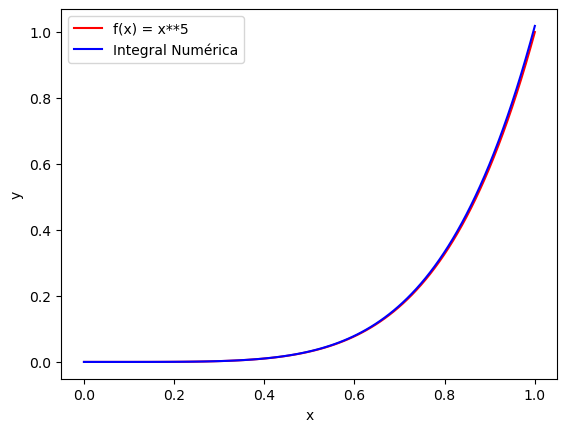

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función original y su integral
def f(x):
    return 5*x**4

def F(x):
    return x**5

# Definir el rango de valores x
x = np.linspace(0, 1, 100)

# Calcular la integral numérica utilizando el método Simpson 3/8
# Podemos ver como si variamos el numero de particiones las graficas difiren mas, n debe ser multiplo de 3
integral_numerica = np.array([simpson3_8(0,x[i],3,f) for i in range(len(x))])

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Graficar la función original en color rojo
ax.plot(x, F(x), color='red', label='f(x) = x**5')

# Graficar la integral numérica en color azul
ax.plot(x, integral_numerica, color='blue', label='Integral Numérica')

# Agregar leyenda y etiquetas de los ejes
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
# Mostrar la gráfica
plt.show()


# Funcion sin solucion numerica

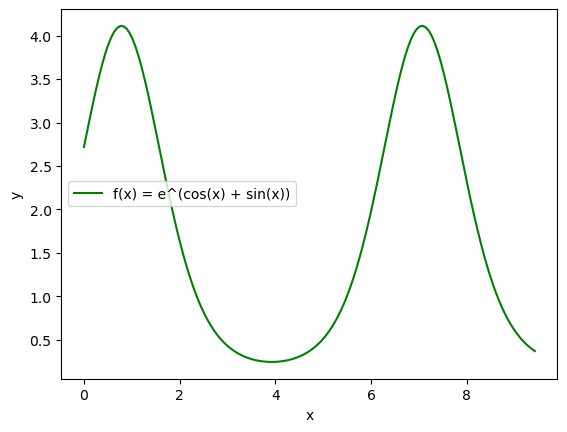

In [16]:
from math import exp,cos,sin,pi
def funcionSinSolucionAnalitica(x):
    return exp(cos(x)+sin(x))

x = np.linspace(0,3*pi, 150)
# Crear la figura y los ejes
fig, ax = plt.subplots()
y = np.array([funcionSinSolucionAnalitica(xi) for xi in x ])
# Graficar la función original en color rojo
ax.plot(x, y, color='green', label='f(x) = e^(cos(x) + sin(x))')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
# Mostrar la gráfica
plt.show()

# Grafica de la Integral
$$\int_{0}^{x} e^{\cos{x} + \sin{x}}dx$$

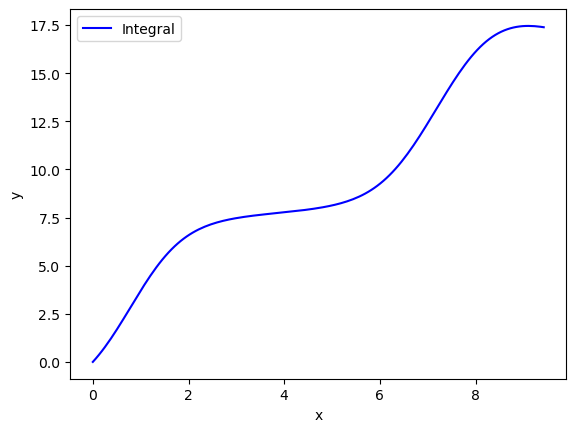

In [20]:
x = np.linspace(0,3*pi, 150)
# Crear la figura y los ejes
fig, ax = plt.subplots()
y = np.array([simpson3_8(0,xi,9,funcionSinSolucionAnalitica) for xi in x ])
# Graficar la función original en color rojo
ax.plot(x, y, color='Blue', label='Integral')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
# Mostrar la gráfica
plt.show()

# Ecuaciones Diferenciales mediante Euler Gauss
$$\frac{dy}{dx}=f(x,y)$$

In [27]:
def yAproximate(yi,xi,h,f):
    return yi+h*f(xi,yi)
def yCorreced(yi,yAproximate,xi,h,f):
    return yi+(h/2)*(f(xi,yi)+f(xi+h,yAproximate))
def euler_gauss(x0,xn,y0,n,f):
    h = abs((xn-x0)/n)
    yi = [y0]+[0]*n
    for i in range(1,n+1):
        yPrev = yi[i-1]
        yAprox = yAproximate(yPrev,x0+i*h,h,f)
        yi[i] = yCorreced(yPrev,yAprox,x0+i*h,h,f)
    return yi

$$\frac{dy}{dy}=2-\frac{y}{x},y(1)=0$$

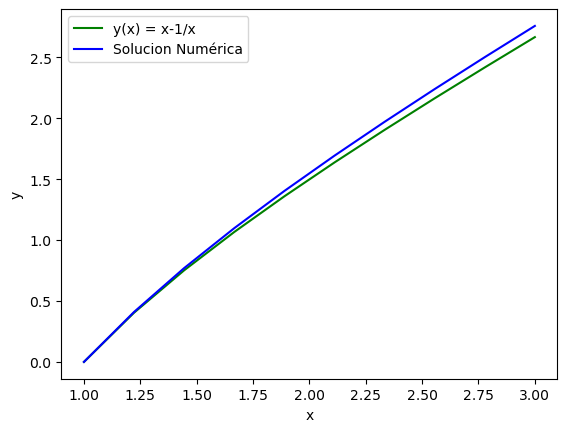

In [30]:
def solucionAnalitica(x):
    return x - 1/x
def fxy(x,y):
    return 2 - y/x

# Definir el rango de valores x
n = 10
x = np.linspace(1, 3, n)

# Calcular la solucion numerica utilizando el método Simpson 3/8
# Podemos ver como si variamos el numero de particiones las graficas difiren mas
particiones = n -1
solucionNumerica = euler_gauss(1,3,0,particiones,fxy)

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Graficar la función original en color rojo
ax.plot(x, solucionAnalitica(x), color='green', label='y(x) = x-1/x')

# Graficar la integral numérica en color azul
ax.plot(x, solucionNumerica, color='blue', label='Solucion Numérica')

# Agregar leyenda y etiquetas de los ejes
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
# Mostrar la gráfica
plt.show()